In [27]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(23040, 3)


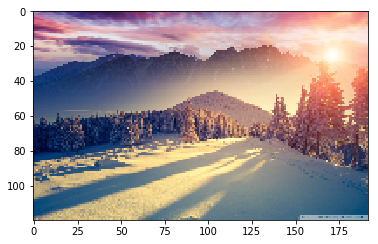

In [28]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

r, c = im.shape[:2]
out_r = 120
im = cv2.resize(im, (int(out_r*float(c)/r), out_r))
pixels = im.reshape((-1, 3))

print pixels.shape
plt.imshow(im)

In [11]:
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')

In [13]:
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per

array([ 0.0859809 ,  0.1516059 ,  0.08407118,  0.14392361,  0.15807292,
        0.12929687,  0.15151909,  0.09552951], dtype=float32)

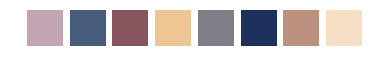

In [14]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [15]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

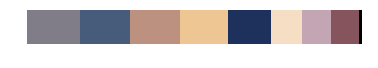

In [21]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()